# Thota Varshika (20BPS1158)
VIT chennai


# ***AI assignment-3***

# CNN Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/Summer_AI/test_data.zip'

destination_folder = '/content/drive/MyDrive/Summer_AI'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,  
                                   shear_range=0.2,  
                                   zoom_range=0.2,   
                                   horizontal_flip=True)  

train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Summer_AI/test_data',
                                              target_size=(64, 64),  
                                              batch_size=32,
                                              class_mode='categorical')

Found 157 images belonging to 16 classes.


# Step 2: Building the CNN

In [ ]:
# Step 2: Building the CNN
cnn = tf.keras.models.Sequential()

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

cnn.add(Flatten())

cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=16, activation='softmax'))

# Step 3: Compiling and Training the CNN

In [ ]:
# Step 3: Compiling and Training the CNN
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
cnn.fit(x=train_set, epochs=50)

Epoch 1/50
5/5 [==============================] - 50s 10s/step - loss: 1.5940 - accuracy: 0.4904
Epoch 2/50
5/5 [==============================] - 49s 10s/step - loss: 1.4709 - accuracy: 0.5159
Epoch 3/50
5/5 [==============================] - 50s 10s/step - loss: 1.3652 - accuracy: 0.5732
Epoch 4/50
5/5 [==============================] - 50s 10s/step - loss: 1.2260 - accuracy: 0.6178
Epoch 5/50
5/5 [==============================] - 50s 10s/step - loss: 1.0986 - accuracy: 0.6879
Epoch 6/50
5/5 [==============================] - 49s 9s/step - loss: 1.0334 - accuracy: 0.6624
Epoch 7/50
5/5 [==============================] - 51s 10s/step - loss: 0.9096 - accuracy: 0.7580
Epoch 8/50
5/5 [==============================] - 51s 10s/step - loss: 0.8806 - accuracy: 0.7389
Epoch 9/50
5/5 [==============================] - 50s 10s/step - loss: 0.8091 - accuracy: 0.7452
Epoch 10/50
5/5 [==============================] - 51s 10s/step - loss: 0.7466 - accuracy: 0.7643
Epoch 11/50
5/5 [=============

In [ ]:
save_model(cnn, '/content/drive/MyDrive/Summer_AI/assign_3_model.h5')


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the saved model
saved_model_path = '/content/drive/MyDrive/Summer_AI/assign_3_model.h5'  
model = tf.keras.models.load_model(saved_model_path)

class_names = list(train_set.class_indices.keys())



def preprocess_image(image_path):
    image = load_img(image_path, target_size=(64, 64))
    image = img_to_array(image)
    image = image / 255.0  
    image = np.expand_dims(image, axis=0)  
    return image

# Example usage
image_path = '/content/drive/MyDrive/Summer_AI/test_data/wcrsrt/100_4462.JPG'  
preprocessed_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(preprocessed_image)
class_index = np.argmax(predictions[0])
confidence = predictions[0][class_index]
class_name = class_names[class_index]

print("Predicted class:", class_index)
print("Predicted class name:", class_name)
print("Confidence:", confidence)



1/1 [==============================] - 0s 65ms/step
Predicted class: 15
Predicted class name: wcrsrt
Confidence: 0.99925333


# **Model Using Transfer Learning**

# VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the VGG16 model

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freeze the pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(16, activation='softmax'))  

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Load and preprocess the data using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/Summer_AI/train_data', 
                                               target_size=(224, 224),
                                               batch_size=32, class_mode='categorical')
test_data = test_datagen.flow_from_directory('/content/drive/MyDrive/Summer_AI/test_data',
                                             target_size=(224, 224), 
                                             batch_size=32, class_mode='categorical')


Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
# Train the model
history = model.fit(train_data, epochs=10, validation_data=test_data)



Epoch 1/10
5/5 [==============================] - 95s 22s/step - loss: 0.7359 - accuracy: 0.7800 - val_loss: 2.4970 - val_accuracy: 0.3694
Epoch 2/10
5/5 [==============================] - 89s 20s/step - loss: 0.4450 - accuracy: 0.8800 - val_loss: 2.5561 - val_accuracy: 0.3503
Epoch 3/10
5/5 [==============================] - 86s 19s/step - loss: 0.3203 - accuracy: 0.9200 - val_loss: 2.8096 - val_accuracy: 0.3631
Epoch 4/10
5/5 [==============================] - 120s 29s/step - loss: 0.1985 - accuracy: 0.9533 - val_loss: 3.0649 - val_accuracy: 0.3503
Epoch 5/10
5/5 [==============================] - 89s 20s/step - loss: 0.1606 - accuracy: 0.9600 - val_loss: 2.9509 - val_accuracy: 0.3567
Epoch 6/10
5/5 [==============================] - 88s 21s/step - loss: 0.1166 - accuracy: 0.9733 - val_loss: 2.9077 - val_accuracy: 0.3694
Epoch 7/10
5/5 [==============================] - 87s 19s/step - loss: 0.0880 - accuracy: 0.9933 - val_loss: 2.7887 - val_accuracy: 0.4076
Epoch 8/10
5/5 [==========

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/Summer_AI/AI_assign3_vgg_model.h5')



In [ ]:
# Load the model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Summer_AI/AI_assign3_vgg_model.h5')


In [ ]:
# Use the loaded model to predict the class of an image
image_path = '/content/100_4453.JPG'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0
image = tf.expand_dims(image, axis=0)
predictions = loaded_model.predict(image)
class_index = tf.argmax(predictions, axis=1)[0]
class_label = train_data.class_indices
for key, value in class_label.items():
    if value == class_index:
        predicted_class = key
        break
print("Predicted Class:", predicted_class)

1/1 [==============================] - 1s 810ms/step
Predicted Class: wcrsrt


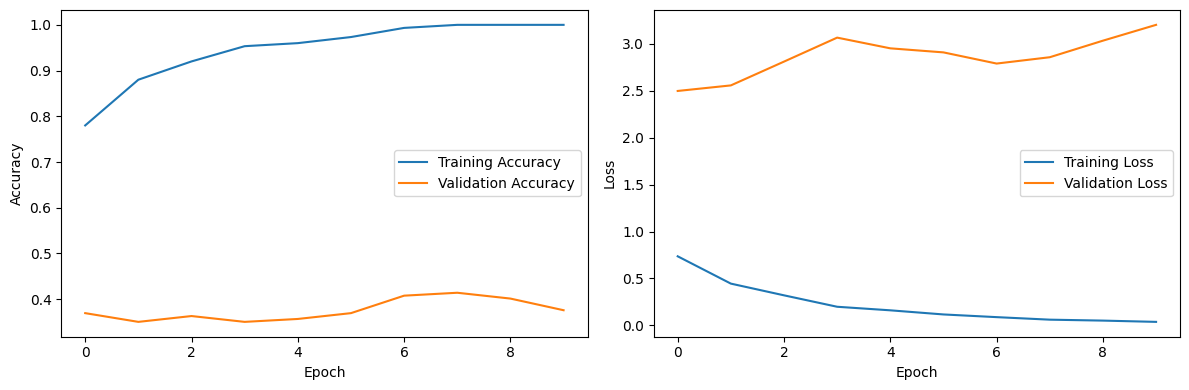

In [ ]:
# Plot accuracy and loss curves
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()